<a href="https://colab.research.google.com/github/vitorquintella/personal-ml-study/blob/main/Exerc%C3%ADcio_Rede_Neural_Tradicional_fashion_entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resumo
* Esta base se mostrou uma base muito mais fácil para o treinamento.
* Os modelos iniciais deram bom desempenho.
* Modelos sinmplificados mantiveram o desempenho
* Fica a pergunta:  com modelos mais elaborados ou com maior dedicação, seria possível superar os 84-88% de acurácia?
  * Acredito que sim.
* Aparentemente eliminamos o overfitting com o dropout.
  * não houve desempenho em teste tão bom quanto em treino

### Prática
1. Aquisição e pré-processamento dos dados
2. Treinamento
* Implementar arquitetura
* Definir otimizadores, métricas e regularizadores
3. Teste (avaliação de desempenho)

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import glob # Uma boa bilioteca de manipulação entre arquivos é "glob"
from sklearn.model_selection import train_test_split
import cv2 # Ubiblioteca para manipulação de imagens
import tensorflow
import matplotlib.pyplot as plot
from random import randint
from sklearn.preprocessing import OneHotEncoder

from tensorflow.python.keras.layers import Input, Dense, Activation, Dropout, Flatten
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.keras import datasets
from tensorflow.keras.metrics import AUC

AttributeError: module 'google.protobuf.internal.containers' has no attribute 'MutableMapping'

In [2]:
def random_plot(X,y):
# Vizualizando algumas imagens aleatórias
  f,ax = plot.subplots(5,5) 
  f.subplots_adjust(0,0,3,3)
  for i in range(0,5,1):
      for j in range(0,5,1):
          rnd_number = randint(0,len(X))
          ax[i,j].imshow(X[rnd_number], cmap ='gray')
          ax[i,j].set_title(y[rnd_number])
          ax[i,j].axis('off')

In [3]:
(X, y), (X_test, y_test) = datasets.fashion_mnist.load_data()

NameError: name 'datasets' is not defined

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
     X, y, stratify=y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape

(40200, 28, 28)

In [ ]:
def translate_ylabels(y):
  classes_labels = {0:	'T-shirt/top',
                    1:	'Trouser',
                    2:	'Pullover',
                    3:	'Dress',
                    4:	'Coat',
                    5:	'Sandal',
                    6:	'Shirt',
                    7:	'Sneaker',
                    8:	'Bag',
                    9:	'Ankle_boot'}
  return np.array([classes_labels[i] for i in y])

          

y = translate_ylabels(y)
y_train = translate_ylabels(y_train)
y_val = translate_ylabels(y_val)
y_test = translate_ylabels(y_test)

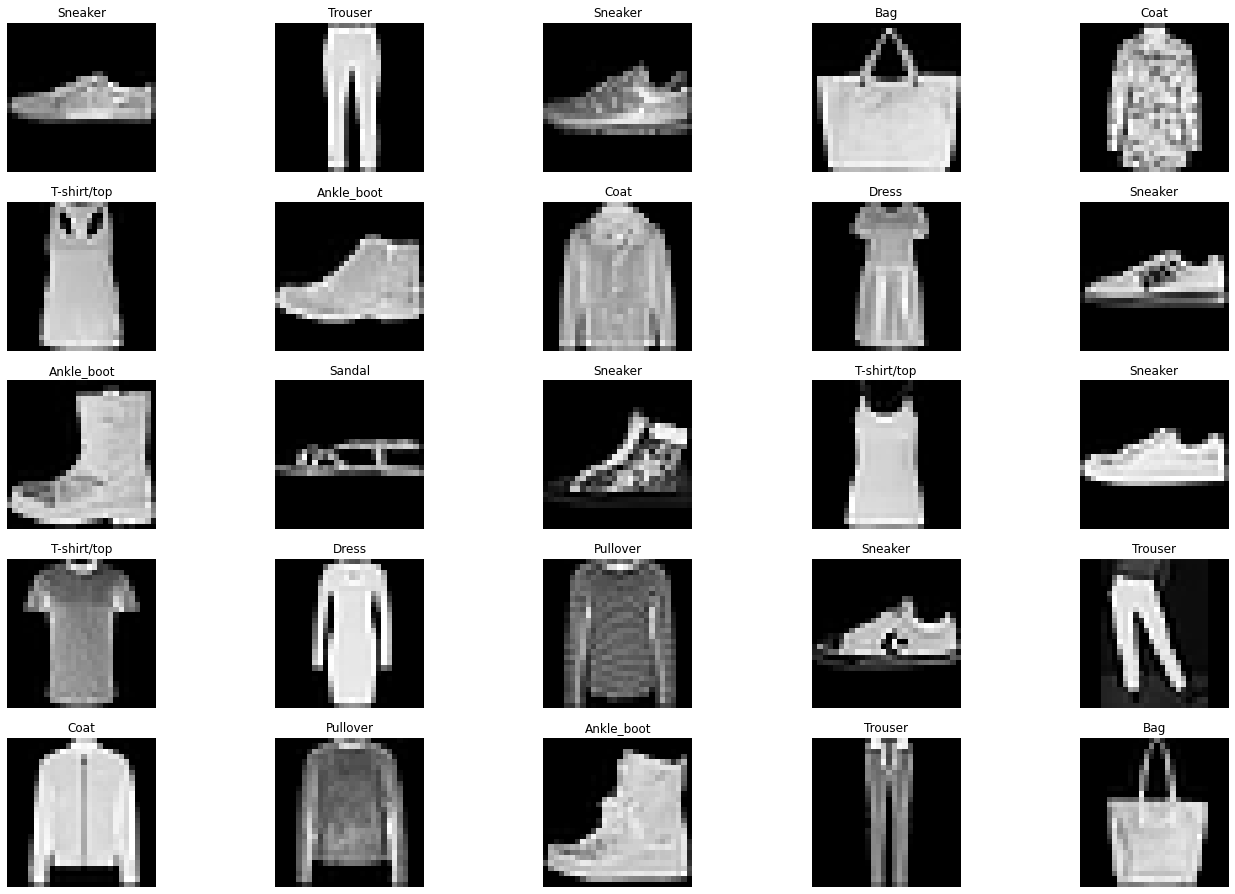

In [ ]:
random_plot(X_train,y_train)

### Pré-processamento

In [ ]:
# Ajustando o y
hot = OneHotEncoder()
y_train = hot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_val = hot.transform(y_val.reshape(-1, 1)).toarray()
y_test = hot.transform(y_test.reshape(-1, 1)).toarray()


# Ajustando o X entre 0 e 1
m = np.max(X_train)
X_train = X_train/m
X_val = X_val/m
X_teste = X_test/m

#### 4. Treinamento - definição de arquitetura

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Visualizando resultados
def plot_overfitting(historico, metric):
  loss = historico.history[metric]
  val_loss = historico.history['val_'+metric]
  epochs = range(len(loss))
  plt.figure()
  plt.plot(epochs, loss, 'bo', label = 'Training loss')
  plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()



##### 6.1 - Rede inicial

###### modelo, fitting, predict

In [ ]:
n_classes = 10

# Criando um modelo sequencial
rede_simples = Sequential()
rede_simples.add(Flatten()) 
n_pixels =  X_train.shape[1]*X_train.shape[2]
rede_simples.add(Dense(52,  input_dim = n_pixels))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(52))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(52))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(n_classes))
rede_simples.add(Activation('softmax'))

# Categorical_crossentropy é uma perda adaptada para categoricas
# Podemos utilizar métricas para visualizar informações mais comums em ML
rede_simples.compile(loss = 'categorical_crossentropy',
                     optimizer = 'Adam', 
                     metrics=['accuracy',AUC(from_logits=True)])
# Treinamento
historico = rede_simples.fit(X_train, 
                             y_train, 
                             epochs = 15,
                             batch_size=64,
                             verbose = 1,
                             validation_data = (X_val, y_val))

Epoch 1/15
629/629 [==============================] - 6s 4ms/step - loss: 0.6223 - accuracy: 0.7818 - auc: 0.9406 - val_loss: 0.4290 - val_accuracy: 0.8502 - val_auc: 0.9790
Epoch 2/15
629/629 [==============================] - 2s 3ms/step - loss: 0.4191 - accuracy: 0.8489 - auc: 0.9823 - val_loss: 0.3759 - val_accuracy: 0.8676 - val_auc: 0.9843
Epoch 3/15
629/629 [==============================] - 2s 4ms/step - loss: 0.3766 - accuracy: 0.8644 - auc: 0.9856 - val_loss: 0.3928 - val_accuracy: 0.8593 - val_auc: 0.9863
Epoch 4/15
629/629 [==============================] - 2s 3ms/step - loss: 0.3505 - accuracy: 0.8722 - auc: 0.9869 - val_loss: 0.3513 - val_accuracy: 0.8737 - val_auc: 0.9875
Epoch 5/15
629/629 [==============================] - 2s 3ms/step - loss: 0.3350 - accuracy: 0.8777 - auc: 0.9880 - val_loss: 0.3427 - val_accuracy: 0.8783 - val_auc: 0.9883
Epoch 6/15
629/629 [==============================] - 2s 3ms/step - loss: 0.3190 - accuracy: 0.8828 - auc: 0.9887 - val_loss: 0.35

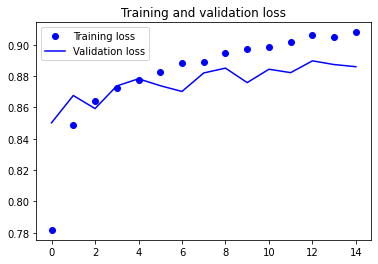

In [ ]:
# plot_overfitting(historico,'loss')
# plot_overfitting(historico,'auc')
plot_overfitting(historico,'accuracy')

###### Resultados

In [ ]:
metric_treino = historico.history['accuracy'][-1]
metric_val = historico.history['val_accuracy'][-1]

print(f'accuracy treino:    {metric_treino:.4f}')
print(f'accuracy validação: {metric_val:.4f}')


accuracy treino:    0.9080
accuracy validação: 0.8860


##### 6.2 - Rede reduzida

###### modelo, fitting, predict

In [ ]:
n_classes = 10

# Criando um modelo sequencial
rede_simples = Sequential()
rede_simples.add(Flatten()) 
n_pixels =  X_train.shape[1]*X_train.shape[2]
rede_simples.add(Dense(52,  input_dim = n_pixels))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(52))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(n_classes))
rede_simples.add(Activation('softmax'))

# Categorical_crossentropy é uma perda adaptada para categoricas
# Podemos utilizar métricas para visualizar informações mais comums em ML
rede_simples.compile(loss = 'categorical_crossentropy',
                     optimizer = 'Adam', 
                     metrics=['accuracy',AUC(from_logits=True)])
# Treinamento
historico = rede_simples.fit(X_train, 
                             y_train, 
                             epochs = 15,
                             batch_size=64,
                             verbose = 1,
                             validation_data = (X_val, y_val))

Epoch 1/15
629/629 [==============================] - 3s 4ms/step - loss: 0.6067 - accuracy: 0.7878 - auc_1: 0.9540 - val_loss: 0.4387 - val_accuracy: 0.8495 - val_auc_1: 0.9801
Epoch 2/15
629/629 [==============================] - 2s 4ms/step - loss: 0.4261 - accuracy: 0.8480 - auc_1: 0.9829 - val_loss: 0.3961 - val_accuracy: 0.8605 - val_auc_1: 0.9844
Epoch 3/15
629/629 [==============================] - 2s 3ms/step - loss: 0.3841 - accuracy: 0.8610 - auc_1: 0.9854 - val_loss: 0.3684 - val_accuracy: 0.8706 - val_auc_1: 0.9863
Epoch 4/15
629/629 [==============================] - 2s 3ms/step - loss: 0.3568 - accuracy: 0.8699 - auc_1: 0.9870 - val_loss: 0.3632 - val_accuracy: 0.8704 - val_auc_1: 0.9875
Epoch 5/15
629/629 [==============================] - 2s 3ms/step - loss: 0.3401 - accuracy: 0.8743 - auc_1: 0.9879 - val_loss: 0.3489 - val_accuracy: 0.8726 - val_auc_1: 0.9883
Epoch 6/15
629/629 [==============================] - 2s 3ms/step - loss: 0.3224 - accuracy: 0.8813 - auc_1: 0

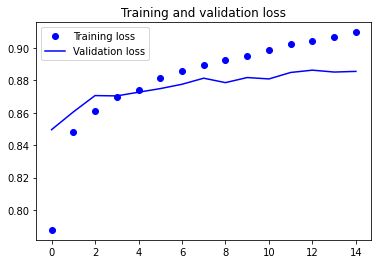

In [ ]:
# plot_overfitting(historico,'loss')
# plot_overfitting(historico,'auc')
plot_overfitting(historico,'accuracy')

###### Resultados

In [ ]:
metric_treino = historico.history['accuracy'][-1]
metric_val = historico.history['val_accuracy'][-1]

print(f'accuracy treino:    {metric_treino:.4f}')
print(f'accuracy validação: {metric_val:.4f}')


accuracy treino:    0.9096
accuracy validação: 0.8855


##### 6.2 - Rede mais reduzida


###### modelo, fitting, predict

In [ ]:
n_classes = 10

# Criando um modelo sequencial
rede_simples = Sequential()
rede_simples.add(Flatten()) 
n_pixels =  X_train.shape[1]*X_train.shape[2]
rede_simples.add(Dense(26,  input_dim = n_pixels))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(26))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(n_classes))
rede_simples.add(Activation('softmax'))

# Categorical_crossentropy é uma perda adaptada para categoricas
# Podemos utilizar métricas para visualizar informações mais comums em ML
rede_simples.compile(loss = 'categorical_crossentropy',
                     optimizer = 'Adam', 
                     metrics=['accuracy',AUC(from_logits=True)])
# Treinamento
historico = rede_simples.fit(X_train, 
                             y_train, 
                             epochs = 15,
                             batch_size=64,
                             verbose = 1,
                             validation_data = (X_val, y_val))

Epoch 1/15
629/629 [==============================] - 3s 4ms/step - loss: 0.6727 - accuracy: 0.7667 - auc_2: 0.9434 - val_loss: 0.4812 - val_accuracy: 0.8332 - val_auc_2: 0.9764
Epoch 2/15
629/629 [==============================] - 2s 3ms/step - loss: 0.4609 - accuracy: 0.8388 - auc_2: 0.9798 - val_loss: 0.4232 - val_accuracy: 0.8529 - val_auc_2: 0.9820
Epoch 3/15
629/629 [==============================] - 2s 3ms/step - loss: 0.4187 - accuracy: 0.8503 - auc_2: 0.9833 - val_loss: 0.4273 - val_accuracy: 0.8471 - val_auc_2: 0.9841
Epoch 4/15
629/629 [==============================] - 2s 3ms/step - loss: 0.3956 - accuracy: 0.8583 - auc_2: 0.9848 - val_loss: 0.3754 - val_accuracy: 0.8705 - val_auc_2: 0.9854
Epoch 5/15
629/629 [==============================] - 2s 3ms/step - loss: 0.3762 - accuracy: 0.8655 - auc_2: 0.9859 - val_loss: 0.3846 - val_accuracy: 0.8625 - val_auc_2: 0.9864
Epoch 6/15
629/629 [==============================] - 2s 3ms/step - loss: 0.3640 - accuracy: 0.8689 - auc_2: 0

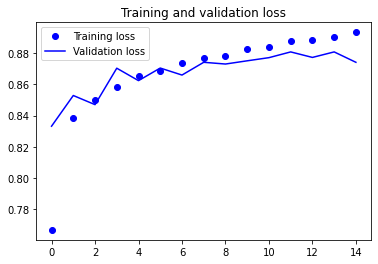

In [ ]:
# plot_overfitting(historico,'loss')
# plot_overfitting(historico,'auc')
plot_overfitting(historico,'accuracy')

###### Resultados
Perda de desempenho

In [ ]:
metric_treino = historico.history['accuracy'][-1]
metric_val = historico.history['val_accuracy'][-1]

print(f'accuracy treino:    {metric_treino:.4f}')
print(f'accuracy validação: {metric_val:.4f}')


accuracy treino:    0.8935
accuracy validação: 0.8742


##### 6.2 - Rede reduzida multipla

###### modelo, fitting, predict

In [ ]:
n_classes = 10

# Criando um modelo sequencial
rede_simples = Sequential()
rede_simples.add(Flatten()) 
n_pixels =  X_train.shape[1]*X_train.shape[2]
rede_simples.add(Dense(52,  input_dim = n_pixels))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(52))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(52))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(52))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(52))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(n_classes))
rede_simples.add(Activation('softmax'))

# Categorical_crossentropy é uma perda adaptada para categoricas
# Podemos utilizar métricas para visualizar informações mais comums em ML
rede_simples.compile(loss = 'categorical_crossentropy',
                     optimizer = 'Adam', 
                     metrics=['accuracy',AUC(from_logits=True)])

es = EarlyStopping(monitor = 'val_loss', 
                   min_delta = 0.001, 
                   patience = 5, 
                   verbose = 1, 
                   mode = 'auto')

# Treinamento
historico = rede_simples.fit(X_train, 
                             y_train, 
                             epochs = 200,
                             batch_size=64,
                             verbose = 1,
                             validation_data = (X_val, y_val),
                             callbacks =[es])

Epoch 1/200
629/629 [==============================] - 3s 4ms/step - loss: 0.6517 - accuracy: 0.7685 - auc_3: 0.9460 - val_loss: 0.4645 - val_accuracy: 0.8364 - val_auc_3: 0.9768
Epoch 2/200
629/629 [==============================] - 2s 4ms/step - loss: 0.4434 - accuracy: 0.8408 - auc_3: 0.9803 - val_loss: 0.3913 - val_accuracy: 0.8597 - val_auc_3: 0.9827
Epoch 3/200
629/629 [==============================] - 2s 4ms/step - loss: 0.3878 - accuracy: 0.8583 - auc_3: 0.9842 - val_loss: 0.3734 - val_accuracy: 0.8653 - val_auc_3: 0.9853
Epoch 4/200
629/629 [==============================] - 2s 4ms/step - loss: 0.3613 - accuracy: 0.8677 - auc_3: 0.9861 - val_loss: 0.3702 - val_accuracy: 0.8683 - val_auc_3: 0.9867
Epoch 5/200
629/629 [==============================] - 2s 4ms/step - loss: 0.3454 - accuracy: 0.8725 - auc_3: 0.9872 - val_loss: 0.3639 - val_accuracy: 0.8671 - val_auc_3: 0.9876
Epoch 6/200
629/629 [==============================] - 2s 4ms/step - loss: 0.3256 - accuracy: 0.8796 - au

###### Resultados

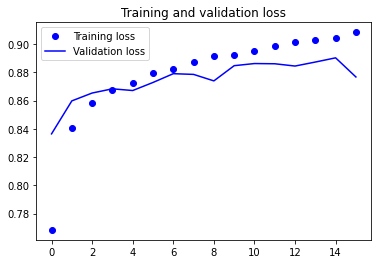

In [ ]:
# plot_overfitting(historico,'loss')
# plot_overfitting(historico,'auc')
plot_overfitting(historico,'accuracy')

In [ ]:
metric_treino = historico.history['accuracy'][-1]
metric_val = historico.history['val_accuracy'][-1]

print(f'accuracy treino:    {metric_treino:.4f}')
print(f'accuracy validação: {metric_val:.4f}')


accuracy treino:    0.9083
accuracy validação: 0.8767


##### 6.2 - Rede rasa com dropout

Melhor dedesempenho que a profunda, em uma rede mais simples. com resultado mais estável

###### modelo, fitting, predict

In [ ]:
n_classes = 10

# Criando um modelo sequencial
rede_simples = Sequential()
rede_simples.add(Flatten()) 
n_pixels =  X_train.shape[1]*X_train.shape[2]
rede_simples.add(Dense(104,  input_dim = n_pixels))
rede_simples.add(Dropout(0.2))
rede_simples.add(Activation('relu'))
rede_simples.add(Dropout(0.2))
rede_simples.add(Dense(104))
rede_simples.add(Activation('relu'))
rede_simples.add(Dropout(0.2))
rede_simples.add(Dense(104))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(n_classes))
rede_simples.add(Activation('softmax'))

# Categorical_crossentropy é uma perda adaptada para categoricas
# Podemos utilizar métricas para visualizar informações mais comums em ML
rede_simples.compile(loss = 'categorical_crossentropy',
                     optimizer = 'Adam', 
                     metrics=['accuracy',AUC(from_logits=True)])

es = EarlyStopping(monitor = 'val_loss', 
                   min_delta = 0.001, 
                   patience = 5, 
                   verbose = 1, 
                   mode = 'auto')

# Treinamento
historico = rede_simples.fit(X_train, 
                             y_train, 
                             epochs = 200,
                             batch_size=64,
                             verbose = 1,
                             validation_data = (X_val, y_val),
                             callbacks =[es])

Epoch 1/200
629/629 [==============================] - 3s 4ms/step - loss: 0.7258 - accuracy: 0.7338 - auc_4: 0.9339 - val_loss: 0.4429 - val_accuracy: 0.8404 - val_auc_4: 0.9732
Epoch 2/200
629/629 [==============================] - 2s 4ms/step - loss: 0.5092 - accuracy: 0.8163 - auc_4: 0.9777 - val_loss: 0.3909 - val_accuracy: 0.8618 - val_auc_4: 0.9801
Epoch 3/200
629/629 [==============================] - 2s 4ms/step - loss: 0.4589 - accuracy: 0.8300 - auc_4: 0.9817 - val_loss: 0.3885 - val_accuracy: 0.8626 - val_auc_4: 0.9827
Epoch 4/200
629/629 [==============================] - 2s 4ms/step - loss: 0.4365 - accuracy: 0.8400 - auc_4: 0.9835 - val_loss: 0.4049 - val_accuracy: 0.8494 - val_auc_4: 0.9841
Epoch 5/200
629/629 [==============================] - 2s 4ms/step - loss: 0.4186 - accuracy: 0.8462 - auc_4: 0.9846 - val_loss: 0.3569 - val_accuracy: 0.8711 - val_auc_4: 0.9851
Epoch 6/200
629/629 [==============================] - 2s 4ms/step - loss: 0.4053 - accuracy: 0.8497 - au

###### Resultados

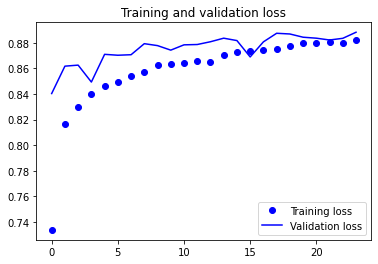

In [ ]:
# plot_overfitting(historico,'loss')
# plot_overfitting(historico,'auc')
plot_overfitting(historico,'accuracy')

In [ ]:
metric_treino = historico.history['accuracy'][-1]
metric_val = historico.history['val_accuracy'][-1]

print(f'accuracy treino:    {metric_treino:.4f}')
print(f'accuracy validação: {metric_val:.4f}')


accuracy treino:    0.8826
accuracy validação: 0.8883


##### 6.2 - Rede produnda com dropout

Pior desempenho

###### modelo, fitting, predict

In [ ]:
n_classes = 10

# Criando um modelo sequencial
rede_simples = Sequential()
rede_simples.add(Flatten()) 
n_pixels =  X_train.shape[1]*X_train.shape[2]
rede_simples.add(Dense(104,  input_dim = n_pixels))
rede_simples.add(Dropout(0.2))
rede_simples.add(Activation('relu'))
rede_simples.add(Dropout(0.2))
rede_simples.add(Dense(128))
rede_simples.add(Activation('relu'))
rede_simples.add(Dropout(0.2))
rede_simples.add(Dense(168))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(192))
rede_simples.add(Activation('relu'))
rede_simples.add(Dropout(0.2))
rede_simples.add(Dense(224))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(248))
rede_simples.add(Activation('relu'))
rede_simples.add(Dropout(0.2))
rede_simples.add(Dense(260))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(n_classes))
rede_simples.add(Activation('softmax'))

# Categorical_crossentropy é uma perda adaptada para categoricas
# Podemos utilizar métricas para visualizar informações mais comums em ML
rede_simples.compile(loss = 'categorical_crossentropy',
                     optimizer = 'Adam', 
                     metrics=['accuracy',AUC(from_logits=True)])

es = EarlyStopping(monitor = 'val_loss', 
                   min_delta = 0.001, 
                   patience = 5, 
                   verbose = 1, 
                   mode = 'auto')

# Treinamento
historico = rede_simples.fit(X_train, 
                             y_train, 
                             epochs = 200,
                             batch_size=128,
                             verbose = 1,
                             validation_data = (X_val, y_val),
                             callbacks =[es])

Epoch 1/200
315/315 [==============================] - 2s 5ms/step - loss: 0.8403 - accuracy: 0.6763 - auc_5: 0.9057 - val_loss: 0.5051 - val_accuracy: 0.8219 - val_auc_5: 0.9647
Epoch 2/200
315/315 [==============================] - 1s 4ms/step - loss: 0.5609 - accuracy: 0.7979 - auc_5: 0.9714 - val_loss: 0.4428 - val_accuracy: 0.8392 - val_auc_5: 0.9750
Epoch 3/200
315/315 [==============================] - 1s 4ms/step - loss: 0.5059 - accuracy: 0.8189 - auc_5: 0.9771 - val_loss: 0.4569 - val_accuracy: 0.8354 - val_auc_5: 0.9785
Epoch 4/200
315/315 [==============================] - 1s 4ms/step - loss: 0.4827 - accuracy: 0.8235 - auc_5: 0.9795 - val_loss: 0.4267 - val_accuracy: 0.8451 - val_auc_5: 0.9804
Epoch 5/200
315/315 [==============================] - 1s 4ms/step - loss: 0.4638 - accuracy: 0.8345 - auc_5: 0.9811 - val_loss: 0.4076 - val_accuracy: 0.8502 - val_auc_5: 0.9817
Epoch 6/200
315/315 [==============================] - 1s 4ms/step - loss: 0.4504 - accuracy: 0.8372 - au

###### Resultados

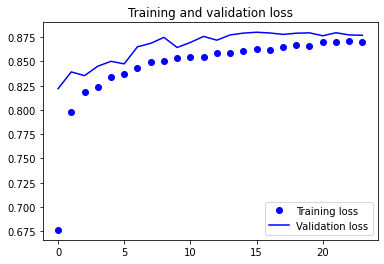

In [ ]:
# plot_overfitting(historico,'loss')
# plot_overfitting(historico,'auc')
plot_overfitting(historico,'accuracy')

In [ ]:
metric_treino = historico.history['accuracy'][-1]
metric_val = historico.history['val_accuracy'][-1]

print(f'accuracy treino:    {metric_treino:.4f}')
print(f'accuracy validação: {metric_val:.4f}')


accuracy treino:    0.8705
accuracy validação: 0.8770


##### 6.2 - Rede rasa com dropout e batch grande

conseguimos eliminar o overfitting com  o auxilio do dropout!
O uso de batchs maiores acelerou o treinamento. alcançando as métricas mais rapidamente.

Parece que o modelo também ficou mais estável

###### modelo, fitting, predict

In [ ]:
n_classes = 10

# Criando um modelo sequencial
rede_simples = Sequential()
rede_simples.add(Flatten()) 
n_pixels =  X_train.shape[1]*X_train.shape[2]
rede_simples.add(Dense(104,  input_dim = n_pixels))
rede_simples.add(Dropout(0.2))
rede_simples.add(Activation('relu'))
rede_simples.add(Dropout(0.2))
rede_simples.add(Dense(104))
rede_simples.add(Activation('relu'))
rede_simples.add(Dropout(0.2))
rede_simples.add(Dense(104))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(n_classes))
rede_simples.add(Activation('softmax'))

# Categorical_crossentropy é uma perda adaptada para categoricas
# Podemos utilizar métricas para visualizar informações mais comums em ML
rede_simples.compile(loss = 'categorical_crossentropy',
                     optimizer = 'Adam', 
                     metrics=['accuracy',AUC(from_logits=True)])

es = EarlyStopping(monitor = 'val_loss', 
                   min_delta = 0.001, 
                   patience = 10, 
                   verbose = 1, 
                   mode = 'auto')

# Treinamento
historico = rede_simples.fit(X_train, 
                             y_train, 
                             epochs = 200,
                             batch_size=64*4,
                             verbose = 1,
                             validation_data = (X_val, y_val),
                             callbacks =[es])

Epoch 1/200
158/158 [==============================] - 2s 6ms/step - loss: 0.8863 - accuracy: 0.6765 - auc_6: 0.8943 - val_loss: 0.4947 - val_accuracy: 0.8277 - val_auc_6: 0.9626
Epoch 2/200
158/158 [==============================] - 1s 4ms/step - loss: 0.5457 - accuracy: 0.8047 - auc_6: 0.9706 - val_loss: 0.4279 - val_accuracy: 0.8437 - val_auc_6: 0.9749
Epoch 3/200
158/158 [==============================] - 1s 4ms/step - loss: 0.4847 - accuracy: 0.8270 - auc_6: 0.9775 - val_loss: 0.3907 - val_accuracy: 0.8577 - val_auc_6: 0.9792
Epoch 4/200
158/158 [==============================] - 1s 4ms/step - loss: 0.4503 - accuracy: 0.8360 - auc_6: 0.9805 - val_loss: 0.3878 - val_accuracy: 0.8566 - val_auc_6: 0.9816
Epoch 5/200
158/158 [==============================] - 1s 4ms/step - loss: 0.4361 - accuracy: 0.8423 - auc_6: 0.9823 - val_loss: 0.3775 - val_accuracy: 0.8601 - val_auc_6: 0.9830
Epoch 6/200
158/158 [==============================] - 1s 4ms/step - loss: 0.4131 - accuracy: 0.8491 - au

###### Resultados

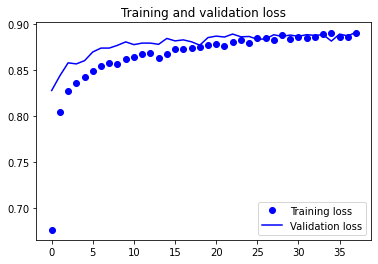

In [ ]:
# plot_overfitting(historico,'loss')
# plot_overfitting(historico,'auc')
plot_overfitting(historico,'accuracy')

In [ ]:
metric_treino = historico.history['accuracy'][-1]
metric_val = historico.history['val_accuracy'][-1]

print(f'accuracy treino:    {metric_treino:.4f}')
print(f'accuracy validação: {metric_val:.4f}')


accuracy treino:    0.8901
accuracy validação: 0.8909


# Desempenho em teste


In [ ]:
# Desempenho em teste
pred_simples = rede_simples.predict(X_test)
confusion_matrix(y_test.argmax(1), pred_simples.argmax(1))

metric_test = accuracy_score(y_test.argmax(1), pred_simples.argmax(1))
print(f'accuracy teste:     {metric_test:.4f}')
print(confusion_matrix(y_test.argmax(1), pred_simples.argmax(1)))

accuracy teste:     0.8572
[[977   0   0   0   0   3   1  19   0   0]
 [  1 975   7   3   2   2   3   4   2   1]
 [  0   1 928  14  41   0  13   0   1   2]
 [  0   5  69 839   6   0  10   0  42  29]
 [  0   3 251  11 657   0  54   0  19   5]
 [ 50   2   0   0   0 926   0  22   0   0]
 [  0  12 195  23  63   0 466   0 231  10]
 [ 60   0   0   0   0  15   0 925   0   0]
 [  2   9  13  13  13   0  38   0 903   9]
 [  1   1   5  15   0   0   1   0   1 976]]


Tivemos queda no desempenho em teste. talvez o overfitting não tenha sido corrigido.